In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Part A

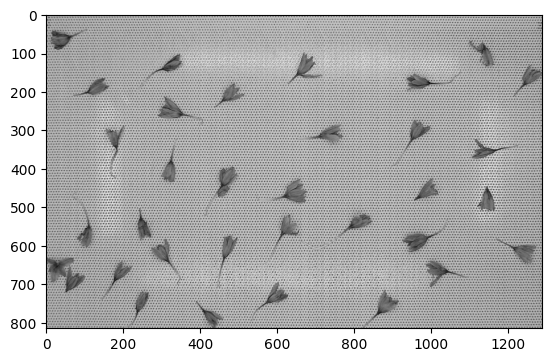

In [2]:
# Read original image
original_image = cv2.imread("/content/saffrun.jpg", cv2.IMREAD_GRAYSCALE)
w, h = original_image.shape[0] , original_image.shape[1]
plt.imshow(original_image, cmap='gray')
plt.show()

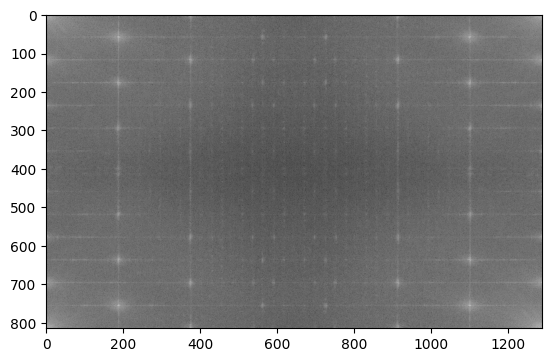

In [3]:
# Applying 2D fourier transform
fourier_transform = np.fft.fft2(original_image)
plt.imshow(np.log(1+np.abs(fourier_transform)), cmap='gray')
plt.show()

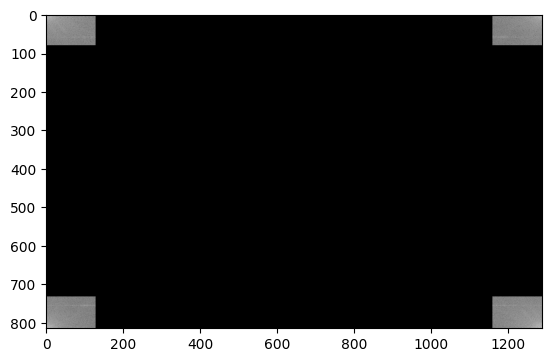

In [4]:
# Setting the noisy points to zero
k = 0.1
fourier_transform[int(w*k):int(w*(1-k))] = 0
fourier_transform[:,int(h*k):int(h*(1-k))] = 0
plt.imshow(np.log(1+np.abs(fourier_transform)), cmap='gray')
plt.show()

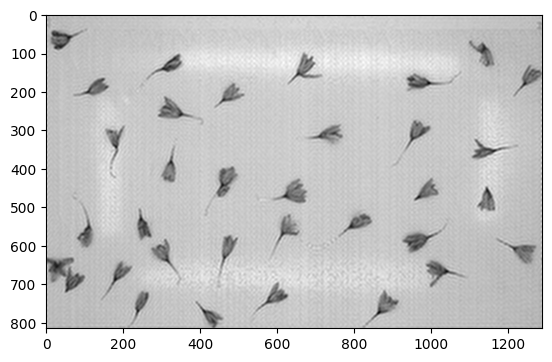

In [5]:
# Applying ifft2 for 2D fourier transform
ifft2_image = np.real(np.fft.ifft2(fourier_transform))
plt.imshow(ifft2_image, cmap='gray')
plt.show()

# Part B

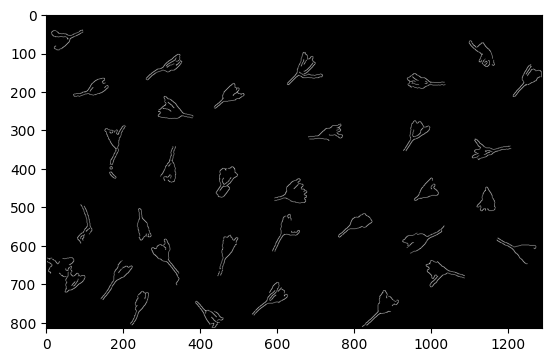

In [20]:
canny_image = cv2.Canny(np.uint8(ifft2_image), 50, 100, L2gradient=True)
plt.imshow(canny_image, cmap='gray')
plt.show()

# Part C

In [11]:
# derivative kernels
derivative_kernel_x_axis = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])
derivative_kernel_y_axis = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
])

In [14]:
Ix = cv2.filter2D(ifft2_image, -1, derivative_kernel_x_axis)
Iy = cv2.filter2D(ifft2_image, -1, derivative_kernel_y_axis)

arctan = np.arctan2(Iy, Ix)

In [17]:
arctan

array([[ 0.        ,  0.        ,  3.14159265, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.57079633,  1.53360547,  2.10410905, ...,  0.62933669,
         0.6962573 ,  1.57079633],
       [ 1.57079633,  1.66174152,  2.07772489, ...,  0.88115437,
         0.95778539,  1.57079633],
       ...,
       [-1.57079633, -1.96280045, -2.6174476 , ..., -0.82276487,
        -0.90450392, -1.57079633],
       [-1.57079633, -1.81284234, -3.08188142, ..., -0.54963116,
        -0.60109731, -1.57079633],
       [ 0.        ,  0.        ,  3.14159265, ...,  0.        ,
         0.        ,  3.14159265]])

In [21]:
theta = np.array([np.rad2deg(x) for x in arctan])

In [22]:
theta

array([[   0.        ,    0.        ,  180.        , ...,    0.        ,
           0.        ,    0.        ],
       [  90.        ,   87.86912086,  120.55656795, ...,   36.05833625,
          39.8926048 ,   90.        ],
       [  90.        ,   95.21077586,  119.04486729, ...,   50.48642654,
          54.87706073,   90.        ],
       ...,
       [ -90.        , -112.46018183, -149.96870037, ...,  -47.14095456,
         -51.82425736,  -90.        ],
       [ -90.        , -103.86821509, -176.57879833, ...,  -31.49154576,
         -34.44033874,  -90.        ],
       [   0.        ,    0.        ,  180.        , ...,    0.        ,
           0.        ,  180.        ]])